## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_df = pd.DataFrame(mouse_metadata)
mouse_df
study_results = pd.read_csv(study_results_path)
results_df =pd.DataFrame(study_results)
#results_df.head()

#Combine the data into a single dataset
merged_df = pd.merge(mouse_df, results_df,how="left",on="Mouse ID")
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the DataFrame.
mouse_count = merged_df['Mouse ID'].unique()  
print(len(mouse_count)) #249


249


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_time_df = merged_df.loc[:, ['Mouse ID', 'Timepoint']]
dup_mouse_time = mouse_time_df.duplicated(subset=['Mouse ID','Timepoint'])
#mouse_time_boolean_df = pd.DataFrame(dup_mouse_time)
duplicate_mouse_ids = merged_df.loc[dup_mouse_time,'Mouse ID']
duplicate_mouse_ids.unique()


array(['g989'], dtype=object)

# Optional: Get all the data for the duplicate mouse ID.

In [14]:
duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df = pd.DataFrame(clean)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
mouse_check = clean_df['Mouse ID'].unique()
print(len(mouse_check)) #249


249


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename('Tumor Volume Mean')
grouped_tumor_median = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename('Tumor Volume Median')
grouped_tumor_var = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename('Tumor Volume Variance')
grouped_tumor_stdev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename('Tumor Volume StDev')
grouped_tumor_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename('Tumor Volume SEM')


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Initialize Dictionary of lists
Regimen_Summary = {'Tumor Volume Mean': grouped_tumor_mean,
                   'Tumor Volume Median': grouped_tumor_median,
                   'Tumor Volume Variance': grouped_tumor_var,
                   'Tumor Volume StDev':grouped_tumor_stdev,
                   'Tumor Volume SEM': grouped_tumor_sem}

Regimen_Summary_df = pd.DataFrame(Regimen_Summary)
Regimen_Summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

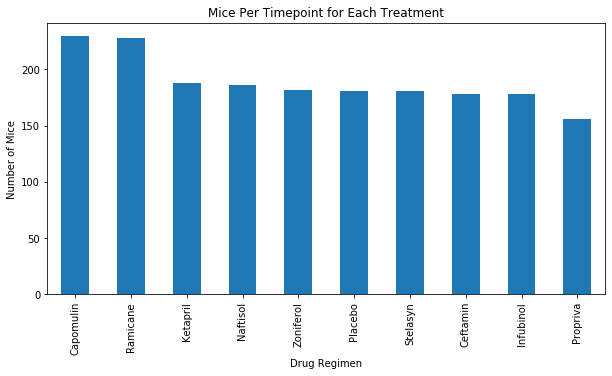

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame down only to those columns to chart
Drug_ID_Time_df = clean_df[["Drug Regimen","Timepoint","Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
Drug_ID_Time_df['Drug Regimen'].value_counts().plot(kind='bar',figsize=(10,5))

# Set a title for the chart
plt.title("Mice Per Timepoint for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()



In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
regimen = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='red', alpha=0.75, align="center")

# Give our chart some labels and a tile
plt.title("TITLE")
plt.xlabel("X-LABLE")
plt.ylabel("Y-LABLE")




NameError: name 'users' is not defined

## Pie Plots

Male      958
Female    930
Name: Sex, dtype: int64


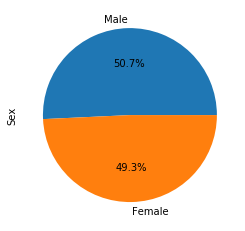

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
M_vs_F = clean_df["Sex"].value_counts()
print(M_vs_F)

M_vs_F.plot(kind="pie",autopct="%1.1f%%")




Male      958
Female    930
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Distribution of Sexs')

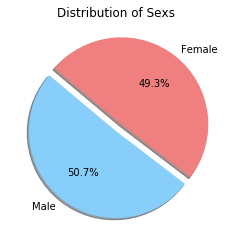

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
M_vs_F = clean_df["Sex"].value_counts()
print(M_vs_F)

# Labels for the sections of our pie chart
gender = ["Male", "Female",]

# The colors of each section of the pie chart
color = ["lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Female" section from the others
explode = (0, .1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(M_vs_F, colors=color,autopct="%1.1f%%", shadow=True, startangle=140, labels=gender, explode=explode)
plt.title('Distribution of Sexs')

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_success = clean_df.groupby(["Mouse ID"]).max()
drug_success = drug_success.reset_index()
drug_success.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [24]:
merged_data = drug_success[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [49]:
Capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)'].rename('Capomulin')
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)'].rename('Infubinol')
Propriva = merged_data.loc[merged_data["Drug Regimen"] == "Propriva"]['Tumor Volume (mm3)'].rename('Propriva')
Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)'].rename('Ramicane')

#Capomulin.sort_values()
#Propriva.sort_values()
#Ramicane.sort_values()
#Infubinol.sort_values()

Top_Drug_Summary = {'Capomulin': Capomulin,
                   'Infubinol': Infubinol,
                   'Propriva': Propriva,
                   'Ramicane':Ramicane,
                   }

Top_Drug_Summary_df = pd.DataFrame(Top_Drug_Summary)
Top_Drug_Summary_df


,Capomulin,Infubinol,Propriva,Ramicane
0,NaN,67.973419,NaN,NaN
1,NaN,65.525743,NaN,NaN
6,NaN,NaN,NaN,38.407618
7,NaN,NaN,NaN,43.047543
10,NaN,NaN,NaN,38.810366
...,...,...,...,...
236,NaN,NaN,NaN,44.183451
240,31.896238,NaN,NaN,NaN
244,NaN,NaN,48.710661,NaN
245,NaN,NaN,NaN,30.638696


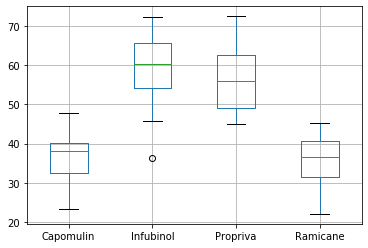

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = Top_Drug_Summary_df.boxplot(column=['Capomulin', 'Infubinol', 'Propriva', 'Ramicane'])



## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
